In [1]:
%load_ext autoreload
%autoreload 2

import os
import json
import pickle
import jsonlines
import pandas as pd
from collections import defaultdict
import shutil
from tqdm import tqdm

def load_pickle_file(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

# 输入json文件路径
JSON_FILE_PATH = 'dataset/rank/nq-rank-10.json'

# 输出文件夹
OUTPUT_DIR = 'output/rank/gen/Qwen/Qwen2.5-7B-Instruct/nq-rank-10'


In [2]:
qid_greedy_count = defaultdict(int)
qid_doc_count = defaultdict(int)
doc_sample_count = defaultdict(int)

for file_name in tqdm(os.listdir(OUTPUT_DIR)):
    if file_name.endswith(".pkl"):
        file_path = os.path.join(OUTPUT_DIR, file_name)
        data = load_pickle_file(file_path)
        ds, qid, did = file_name.split('.')[0].split('-')
        if data['greedy'] is not None:
            qid_greedy_count[qid] += 1
        if len(data['sample']) > 0:
            qid_doc_count[qid] += 1
        doc_sample_count[len(data['sample'])] += 1

  0%|          | 0/4710 [00:00<?, ?it/s]

100%|██████████| 4710/4710 [00:05<00:00, 854.30it/s] 


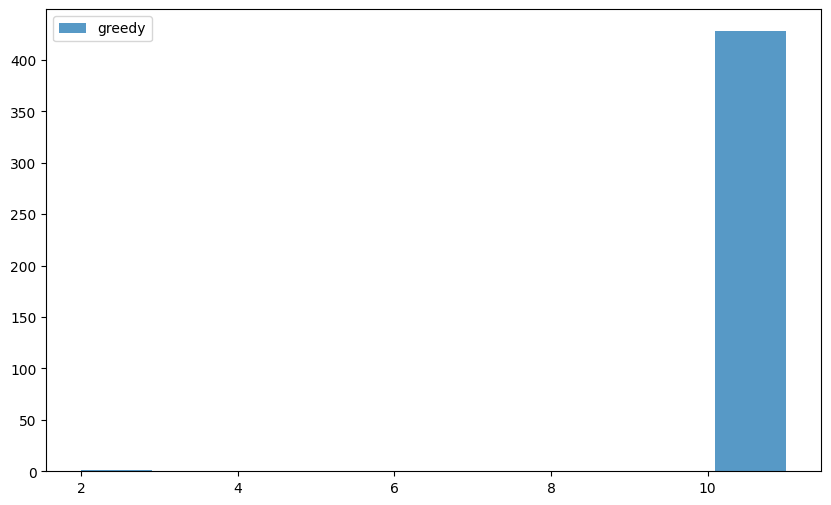

In [3]:
# 可视化qid_greedy_count的分布
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(list(qid_greedy_count.values()), alpha=0.75, label='greedy')
plt.legend()
plt.show()

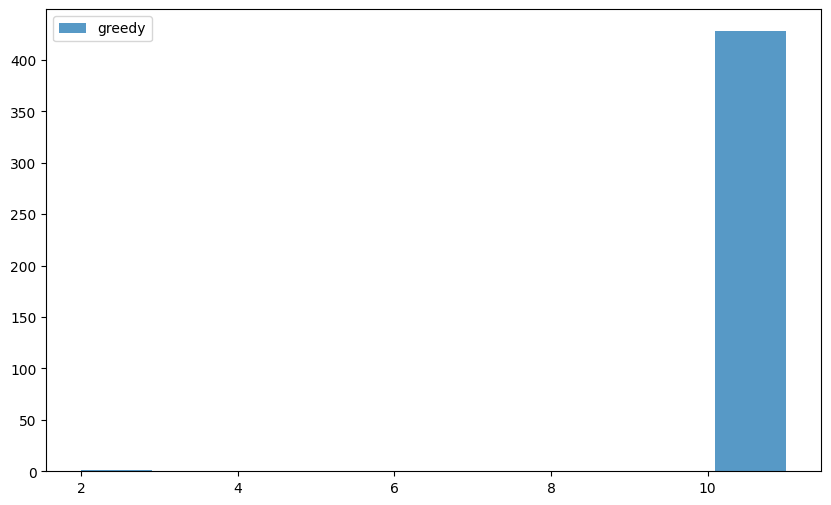

In [4]:
# 可视化qid_doc_count的分布
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(list(qid_doc_count.values()), alpha=0.75, label='greedy')
plt.legend()
plt.show()

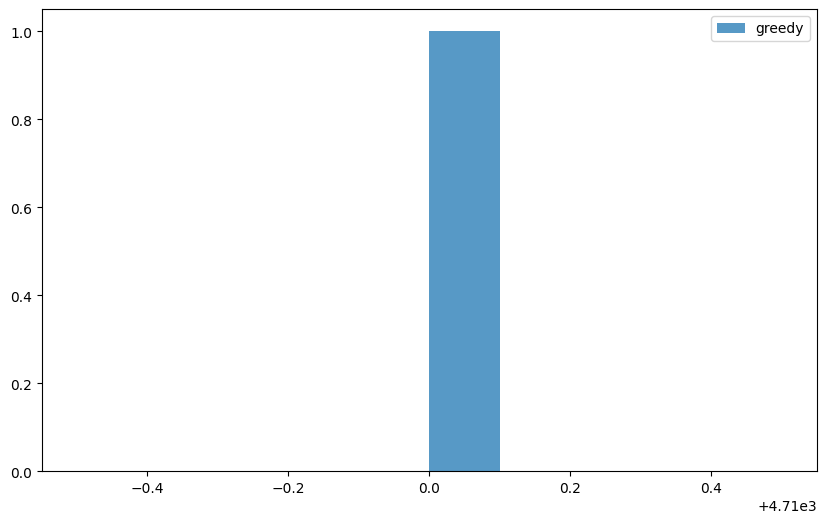

In [5]:
# 可视化doc_sample_count的分布
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(list(doc_sample_count.values()), alpha=0.75, label='greedy')
plt.legend()
plt.show()

In [6]:
doc_sample_count

defaultdict(int, {10: 4710})

In [7]:
for file_name in tqdm(os.listdir(OUTPUT_DIR)):
    if file_name.endswith(".pkl"):
        file_path = os.path.join(OUTPUT_DIR, file_name)
        data = load_pickle_file(file_path)
        print(data)
        break

  0%|          | 0/4710 [00:00<?, ?it/s]

{'id': 'nq-test137-doc1487662', 'greedy': {'text': 'The red car in Fast & Furious 7 with connections to Abu Dhabi is likely the Nissan GT-R, known for its role in Fast & Furious 6 with modified aesthetics and performance enhancements. However, specific details about a red GT-R in Abu Dhabi', 'log_likelihoods': [0.0, -0.8192488551139832, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'hidden_states': {'last_token_embedding': tensor([[ 3.4844, -4.7188, -3.0156,  ..., -0.8164,  1.6094,  4.8125]],
       dtype=torch.bfloat16), 'sec_last_token_embedding': tensor([[[ 5.2490e-03, -9.0942e-03,  9.8267e-03,  ..., -1.4404e-02,
          -1.9653e-02, -6.3782e-03]],

        [[-1.1353e-02,  1.2305e-01,  1.0449e-01,  ..., -1.6211e-01,
          -3.9551e-02, -1.6211e-01]],

        [[-3.3203e-02,  1.4258e-01,